Import Libraries

In [1]:
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
import matplotlib.pyplot as plt

Load the Dataset

In [2]:
# Load datasets
train_df = pd.read_csv('/content/drive/MyDrive/datasets/NLP/training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/NLP/test.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/datasets/NLP/validation.csv')

Text Cleaning

In [3]:
# Function to clean the text
def clean_text_basic(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    return text

# Apply text cleaning
train_df['cleaned_text'] = train_df['text'].apply(clean_text_basic)
test_df['cleaned_text'] = test_df['text'].apply(clean_text_basic)
validation_df['cleaned_text'] = validation_df['text'].apply(clean_text_basic)


Tokenization and Padding

In [4]:
# Define constants
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

# Initialize tokenizer and fit on training data
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(train_df['cleaned_text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_text'])
validation_sequences = tokenizer.texts_to_sequences(validation_df['cleaned_text'])

# Pad sequences to uniform length
train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
validation_padded = pad_sequences(validation_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Get labels
train_labels = train_df['label']
test_labels = test_df['label']
validation_labels = validation_df['label']

Display dataset sample

Training Dataset Sample:
                                                text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                        cleaned_text  
0                            i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2   im grabbing a minute to post i feel greedy wrong  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy  


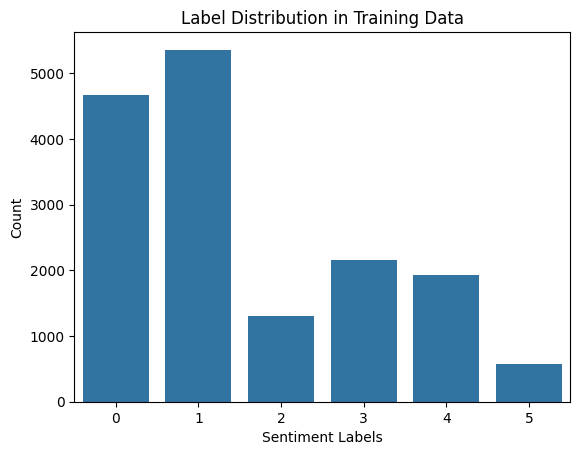

In [14]:
# Display the first few rows of the dataset
print("Training Dataset Sample:")
print(train_df.head())

# Plot label distribution
import seaborn as sns

# Plot the distribution of labels
sns.countplot(x=train_df['label'])
plt.title("Label Distribution in Training Data")
plt.xlabel("Sentiment Labels")
plt.ylabel("Count")
plt.show()

Define CNN Model

In [5]:
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))  # 6 output classes (anger, fear, joy, etc.)
    return model

Define GRU Model

In [6]:
def create_gru_model():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
    model.add(layers.GRU(128, return_sequences=True))
    model.add(layers.GRU(64))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    return model

Define Bidirectional LSTM Model

In [7]:
def create_bilstm_model():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
    model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
    model.add(layers.Bidirectional(layers.LSTM(64)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    return model

Define a Training Function

In [8]:
def train_model_with_optimizer(model, optimizer, model_name):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_padded, train_labels, epochs=10, batch_size=32, validation_data=(validation_padded, validation_labels))
    return history

Train Each Model with Different Optimizers
(CNN Model)

In [9]:
cnn_sgd_history = train_model_with_optimizer(create_cnn_model(), SGD(), 'CNN_SGD')
cnn_adam_history = train_model_with_optimizer(create_cnn_model(), Adam(), 'CNN_Adam')
cnn_adagrad_history = train_model_with_optimizer(create_cnn_model(), Adagrad(), 'CNN_Adagrad')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2893 - loss: 1.6896 - val_accuracy: 0.3520 - val_loss: 1.5815
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3371 - loss: 1.5730 - val_accuracy: 0.3525 - val_loss: 1.5808
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3377 - loss: 1.5794 - val_accuracy: 0.3530 - val_loss: 1.5802
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3429 - loss: 1.5625 - val_accuracy: 0.3510 - val_loss: 1.5799
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3413 - loss: 1.5717 - val_accuracy: 0.3515 - val_loss: 1.5787
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3406 - loss: 1.5796 - val_accuracy: 0.3515 - val_loss: 1.5784
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3488 - loss: 1.5668 - val_accuracy: 0.3505 - val_loss: 1.5767
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3466 - loss: 1.5725 - val_ac

GRU Model

In [10]:
gru_sgd_history = train_model_with_optimizer(create_gru_model(), SGD(), 'GRU_SGD')
gru_adam_history = train_model_with_optimizer(create_gru_model(), Adam(), 'GRU_Adam')
gru_adagrad_history = train_model_with_optimizer(create_gru_model(), Adagrad(), 'GRU_Adagrad')

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3064 - loss: 1.6582 - val_accuracy: 0.3520 - val_loss: 1.5826
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3353 - loss: 1.5800 - val_accuracy: 0.3520 - val_loss: 1.5815
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3370 - loss: 1.5742 - val_accuracy: 0.3520 - val_loss: 1.5813
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3273 - loss: 1.5808 - val_accuracy: 0.3520 - val_loss: 1.5814
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3358 - loss: 1.5716 - val_accuracy: 0.3520 - val_loss: 1.5819
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3300 - loss: 1.5781 - val_accuracy: 0.3520 - val_loss: 1.5810
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3320 - loss: 1.5810 - val_accuracy: 0.3520 - val_loss: 1.5806
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3351 - loss: 1.5787 - val_accuracy:

Bidirectional LSTM Model

In [11]:
bilstm_sgd_history = train_model_with_optimizer(create_bilstm_model(), SGD(), 'BiLSTM_SGD')
bilstm_adam_history = train_model_with_optimizer(create_bilstm_model(), Adam(), 'BiLSTM_Adam')
bilstm_adagrad_history = train_model_with_optimizer(create_bilstm_model(), Adagrad(), 'BiLSTM_Adagrad')

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.3351 - loss: 1.6773 - val_accuracy: 0.3520 - val_loss: 1.5813
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3305 - loss: 1.5822 - val_accuracy: 0.3520 - val_loss: 1.5810
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3391 - loss: 1.5668 - val_accuracy: 0.3520 - val_loss: 1.5814
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3343 - loss: 1.5785 - val_accuracy: 0.3520 - val_loss: 1.5826
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3283 - loss: 1.5765 - val_accuracy: 0.3520 - val_loss: 1.5797
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3324 - loss: 1.5769 - val_accuracy: 0.3520 - val_loss: 1.5800
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3405 - loss: 1.5744 - val_accuracy: 0.3520 - val_loss: 1.5806
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.3359 - loss: 1.5726 - val_

Visualize the Results

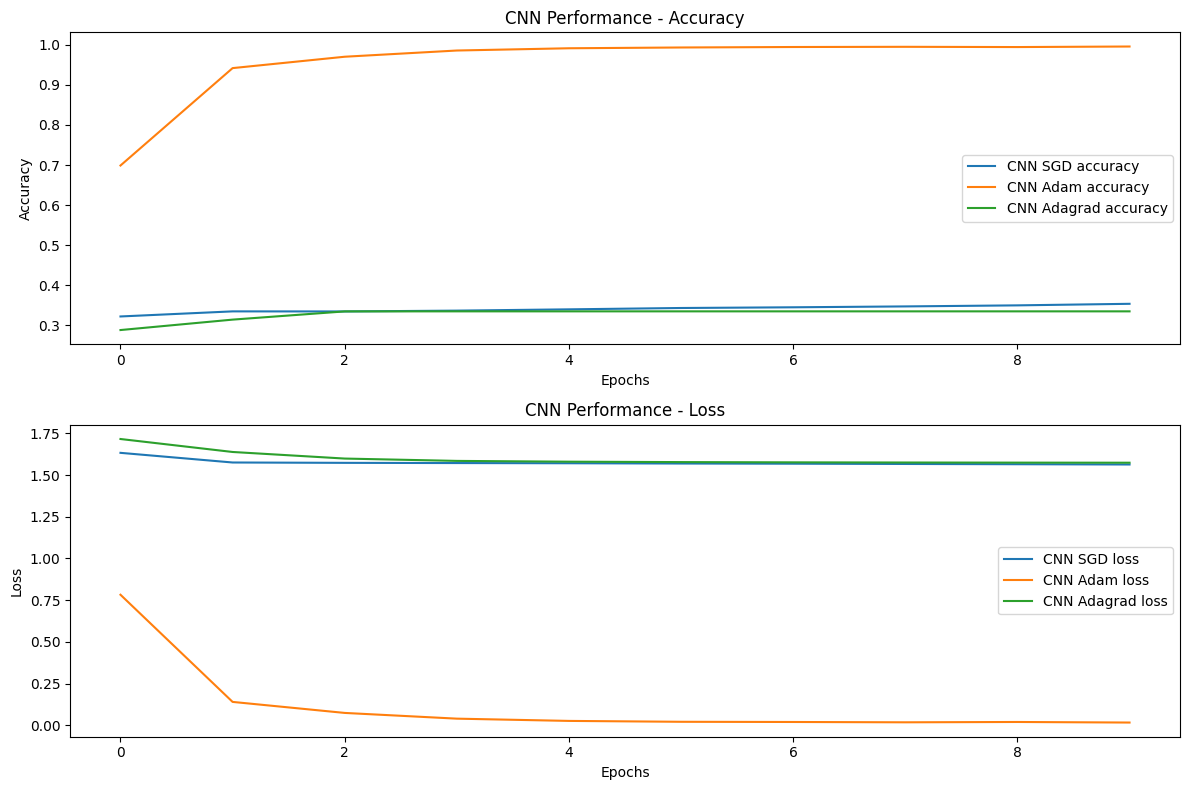

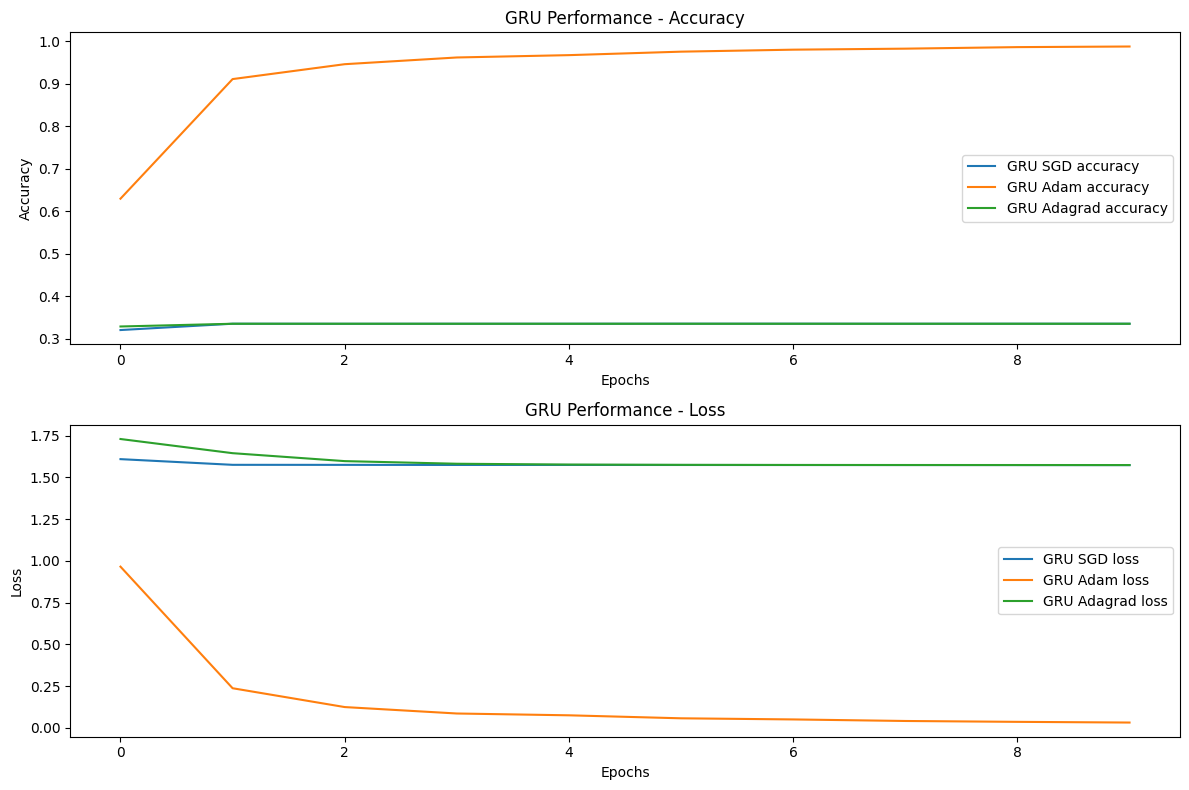

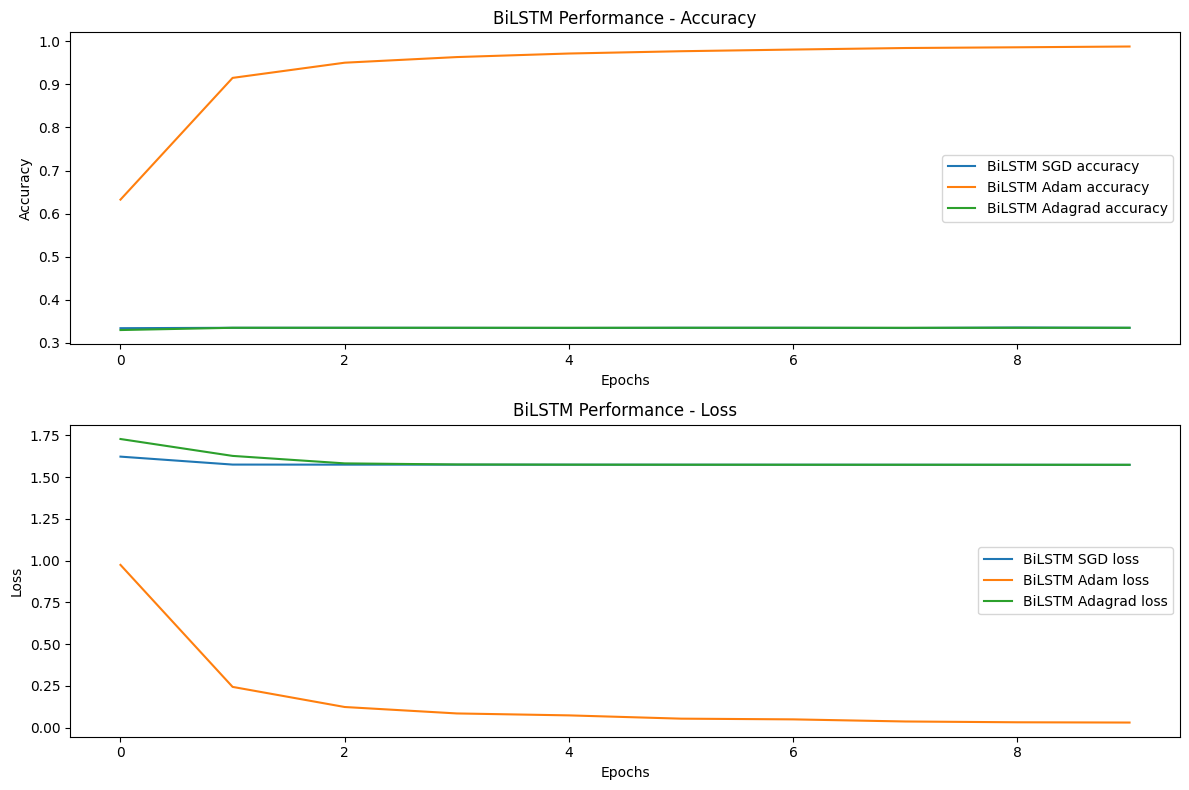

In [12]:
# Function to plot accuracy and loss
def plot_history(histories, title):
    plt.figure(figsize=(12, 8))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    for label, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{label} accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(2, 1, 2)
    for label, history in histories.items():
        plt.plot(history.history['loss'], label=f'{label} loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for CNN
plot_history({
    'CNN SGD': cnn_sgd_history,
    'CNN Adam': cnn_adam_history,
    'CNN Adagrad': cnn_adagrad_history
}, title='CNN Performance')

# Plot for GRU
plot_history({
    'GRU SGD': gru_sgd_history,
    'GRU Adam': gru_adam_history,
    'GRU Adagrad': gru_adagrad_history
}, title='GRU Performance')

# Plot for BiLSTM
plot_history({
    'BiLSTM SGD': bilstm_sgd_history,
    'BiLSTM Adam': bilstm_adam_history,
    'BiLSTM Adagrad': bilstm_adagrad_history
}, title='BiLSTM Performance')

In [16]:
import pandas as pd

# Function to extract final accuracy and loss
def extract_final_metrics(history):
    final_acc = history.history['val_accuracy'][-1]
    final_loss = history.history['val_loss'][-1]
    return final_acc, final_loss

# Create a comparison table for each model-optimizer combination
comparison_results = {
    'CNN SGD': extract_final_metrics(cnn_sgd_history),
    'CNN Adam': extract_final_metrics(cnn_adam_history),
    'CNN Adagrad': extract_final_metrics(cnn_adagrad_history),
    'GRU SGD': extract_final_metrics(gru_sgd_history),
    'GRU Adam': extract_final_metrics(gru_adam_history),
    'GRU Adagrad': extract_final_metrics(gru_adagrad_history),
    'BiLSTM SGD': extract_final_metrics(bilstm_sgd_history),
    'BiLSTM Adam': extract_final_metrics(bilstm_adam_history),
    'BiLSTM Adagrad': extract_final_metrics(bilstm_adagrad_history)
}

# Convert the comparison results to a pandas DataFrame
comparison_df = pd.DataFrame(comparison_results, index=['Validation Accuracy', 'Validation Loss']).T

# Display the table
print("Model Performance (Validation Accuracy & Loss):\n")
print(comparison_df)

Model Performance (Validation Accuracy & Loss):

                Validation Accuracy  Validation Loss
CNN SGD                      0.3610         1.575045
CNN Adam                     0.9190         0.332697
CNN Adagrad                  0.3520         1.579722
GRU SGD                      0.3520         1.579545
GRU Adam                     0.9265         0.264302
GRU Adagrad                  0.3520         1.580276
BiLSTM SGD                   0.3505         1.580467
BiLSTM Adam                  0.9245         0.297618
BiLSTM Adagrad               0.3520         1.580752
